# Accessing the Trigger

In ATLAS all access to trigger data is via the Trigger Decision Tool (TDT). There is quite a bit of information attached to the trigger, and its layout is quite complex - for that reason one should use the TDT to access the data.

In [1]:
import matplotlib.pyplot as plt
from config import ds_zee as ds
from func_adl_servicex_xaodr21 import tdt_chain_fired, tmt_match_object

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


## Looking for events that fired a chain

Lets look at $Z \rightarrow ee$ Monte Carlo for a single electron trigger in the event.

In [2]:
n_electrons = (ds.Select(lambda e:
                            {
                                "n_ele": e.Electrons("Electrons").Where(lambda e: abs(e.eta()) < 2.5).Count(),
                                "fired": tdt_chain_fired("HLT_e60_lhmedium_nod0"),
                            })
                .AsAwkwardArray()
                .value()
               )

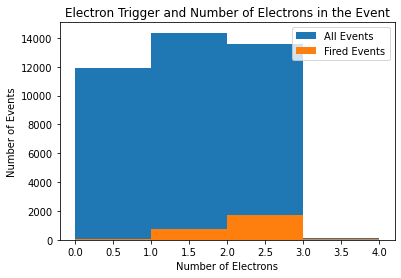

In [3]:
plt.hist(n_electrons.n_ele, bins=4, range=(0, 4), label='All Events')
plt.hist(n_electrons.n_ele[n_electrons.fired], bins=4, range=(0, 4), label='Fired Events')
plt.xlabel('Number of Electrons')
plt.ylabel('Number of Events')
plt.title('Electron Trigger and Number of Electrons in the Event')
_ = plt.legend()

## Trigger Matching

Next, let's find the electrons that matched that trigger that fired above. We'll do this by looking only at events where the trigger has fired, and then asking each electron if it matches withing a $\Delta R$.

In [4]:
matched_electrons = (
    ds.Where(lambda e: tdt_chain_fired("HLT_e60_lhmedium_nod0"))
    .SelectMany(lambda e: e.Electrons("Electrons"))
    .Select(
        lambda e: {
            "pt": e.pt() / 1001.0,
            "eta": e.eta(),
            "is_trig": tmt_match_object("HLT_e60_lhmedium_nod0", e, 0.7),
        }
    )
    .AsAwkwardArray()
    .value()
)

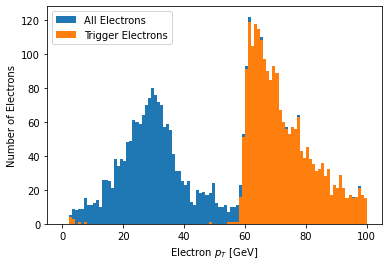

In [5]:
plt.hist(matched_electrons.pt, bins=100, range=(0, 100), label='All Electrons')
trigger_electrons = matched_electrons[matched_electrons.is_trig]
plt.hist(trigger_electrons.pt, bins=100, range=(0, 100), label='Trigger Electrons')
plt.xlabel('Electron $p_T$ [GeV]')
plt.ylabel('Number of Electrons')
_ = plt.legend()

## Further Information

* Tutorial on [trigger for analysis](https://indico.cern.ch/event/860971/contributions/3626403/attachments/1973400/3283452/200122_TriggerTutorial.pdf).
* Trigger Group's [Trigger Analysis Tool](https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerAnalysisTools) twiki page (with a [page devoted to the TDT](https://twiki.cern.ch/twiki/bin/view/Atlas/TrigDecisionTool)).
* [Lowest un-prescaled triggers](https://twiki.cern.ch/twiki/bin/view/Atlas/LowestUnprescaled) per data-taking period twiki.